**Predicting Student performance**

**Problem Statement :-**

In the evolving landscape of education, accurately predicting student academic performance has become crucial for timely interventions and informed decision-making. The objective of this mini-project is to develop a machine learning model that can classify whether a student will pass or fail based on various demographic, academic, and behavioral features.

The analysis is performed on a publicly available dataset from the UCI Machine Learning Repository, which includes details such as parental education, daily alcohol consumption, study time, absences, and previous grades (G1, G2). The final target variable is a binary classification — whether a student passes (G3 ≥ 10) or fails.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [24]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student-mat.csv", sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [25]:
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

1.  Strong Positive Correlation

G1 and G3 → 0.80

G2 and G3 → 0.90

G1 and G2 → 0.85

2. Negative Correlation

Failures and G3 → -0.36

Failures and G1/G2 → -0.35 / -0.36

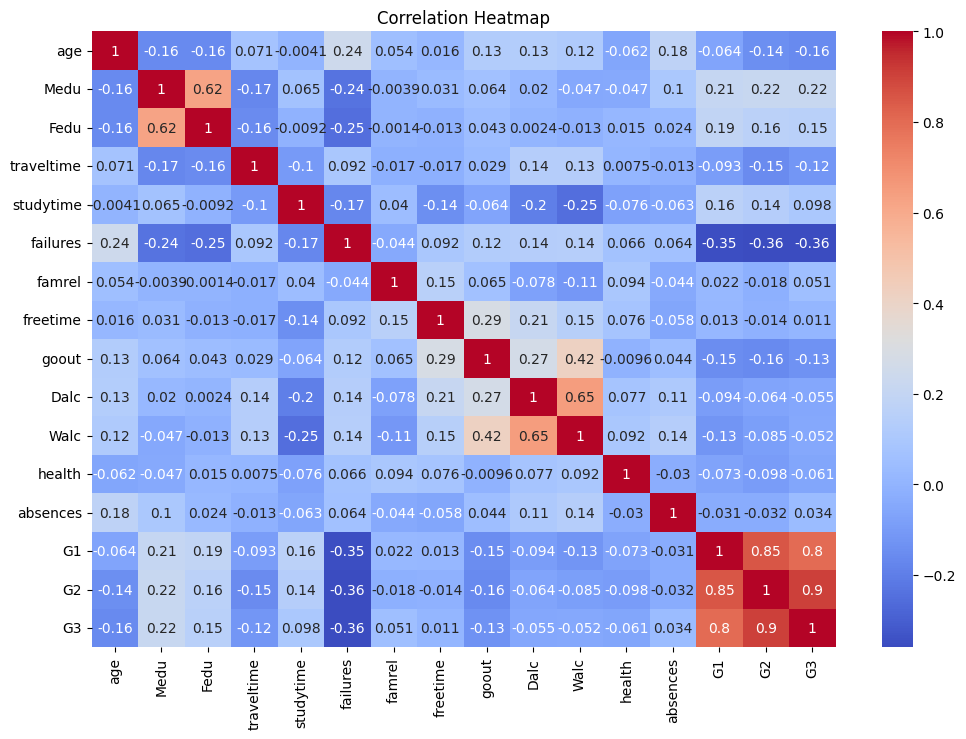

In [26]:
# Correlation with final grade (G3)
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

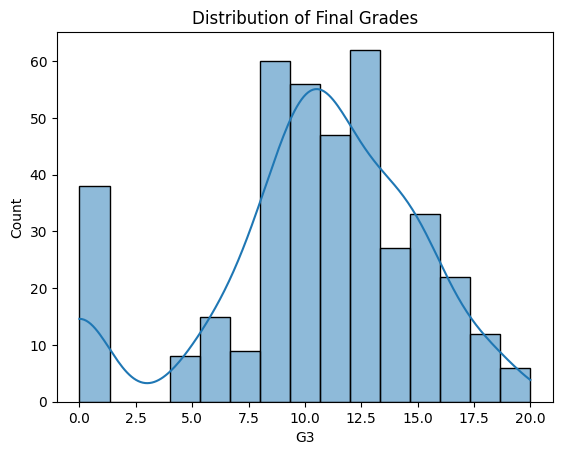

In [27]:
# Distribution of final grade
sns.histplot(data['G3'], bins=15, kde=True)
plt.title('Distribution of Final Grades')
plt.show()


In [28]:
# Pass if G3 >= 10, else fail
data['pass'] = data['G3'].apply(lambda x: 1 if x >= 10 else 0)


In [29]:
label_enc = LabelEncoder()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_enc.fit_transform(data[column])


In [30]:
X = data.drop(['G3', 'pass'], axis=1)
y = data['pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)


This output shows the performance evaluation of a Logistic Regression model used to classify students into pass (1) or fail (0) based on their academic data.

The model correctly predicted ~93.67% of all test cases.



In [33]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9367088607594937
Confusion Matrix:
 [[25  2]
 [ 3 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91        27
           1       0.96      0.94      0.95        52

    accuracy                           0.94        79
   macro avg       0.93      0.93      0.93        79
weighted avg       0.94      0.94      0.94        79

